(section4.1)=
# 4.1 The What and Why of Statistical Modelling

Models are used in all walks of life to facilitate learning. A product designer may build a mock-up of the intended product to learn how the real-life counterpart may work. Similarly, architects use blueprints to learn and communicate something about a building.

These models are abstractions of the real world that capture key characteristics of the thing they imitate. 

No model is perfect because the real world is endlessly complex. Rather, models are approximations of some phenonemon. Models are useful when they allow us to learn something about the subject.   


_Statistical_ modelling is conceptually similar. Simply put, a statistical model is a mathematical abstraction.

In theory, models are infinitely flexible. However, there are many trade-offs, for example between complexity and interpretability, that we will cover in this module. The flexibility of models means that it is important to ask _why_ you are modelling before embarking on a modelling problem. Broadly, modelling efforts are of two types (see below box).

```{admonition} Reasons for Modelling
:class: important

**Modelling for Prediction**. The model's performance is more important than understanding the mechanism of data generation. Here, robust prediction of an outcome or reliable discrimination between different types of data is more important than explaining the underlying phenomenon. These data science tasks crop up often in industry, for example it may be more important to accurately predict movie preferences from a set of input variables than understand _how_ your input variables translate to movie preferences. 

**Modelling for Explanation**. A premium is placed on understanding the mechanism of data generation. We don't want a highly complex model that achieves excellent performance yet does not allow us to better understand the underlying phenomenon. When model interpretability is important there is a trade-off between model complexity and scientific value. 
```

In this course we will focus on **modelling for explanation**, since this type of modelling in more common in scientific research. We do not pretend to be a module that covers the wide variety of machine learning techniques available to apply to your data science problem. 

From now on when we are using the term _models_ what we are _actually_ referring to _statistical models_.

The statistical models we are concerned with attempt to capture key characteristics of **data generating processes** so that we can learn about the associated **phenomenon**. 

To understand these models first we need to think about data for a moment.

## What is data? 

Data is a messy peek into an underlying phenomenon. What we really want to learn about is a **phenomenon**, for example what contributes to good health. However, the real-world is complicated and phenomena are never known precisely. Many natural phenomena have intrinsic variability, or _randomness_. For example, human bodies are massively variable between individuals, so it is reasonable to expect that their health, and also the myriad factors that contribute to it, will be different. 

````{margin}
```{admonition} Randomness
:class: note, dropdown
Even when a process is deterministic (i.e. the same start state produce the same end state each time) it can be complicated enough so that it useful to model it as a random process. In fact, there are very few things that are truly random, we just don't know the models in enough detail. Remember that models are _useful approximations_ of the real world.
```
````

Phenomena are only ever accessed through a process of **measurement**. Measurement brings two barriers to the underlying phenomena. 
- **Sampling Bias**. We can never observe the whole population. This means that we only ever _sample_ some of the distribution. The sample will fail to capture all the characteristics of the population. For example, an alien that picks a couple of individuals from the human timeline might choose a couple of vikings and therefore conclude that all humans have beards. This is called **sampling bias**.
- **Measurement Error**. The measuring device _itself_ could be inaccurate or imprecise. In our example the measuring device is self-reporting, which may have its own variability - the same person may respond differently on different days, and some people may be over or under confident.

Measurement, or observation, provides a set of data. Data are _related_ to the underlying phenomenon, but have been contorted by sampling bias (intrinsic variability will mean that each sample will be different) and measurement uncertainty. 

Together, the phenomenon and method of observation make up the **data generating process**. 

Mapping out the data generating process over the space of all possible events gives rise to what we call a **distribution** (more on this later). Understanding how a data generating process is distributed across members of the population of interest is a key goal of statistical modeling.



In [27]:
# the online jupyter book build doesn't size graphviz output well so we save and load the figure

import graphviz
g = graphviz.Digraph(format='svg')

g.attr(rankdir='LR')
g.graph_attr['size'] = '6,5'
g.attr('node', shape='doublecircle')
g.node('Phenomenon')

g.attr('node', shape='oval')
g.node('Measurement')
g.node('Sampling Process')
g.node('Data Generating Process')


g.edge('Phenomenon','Data Generating Process')
g.edge('Measurement','Data Generating Process')

g.edge('Data Generating Process','Sampling Process')
g.edge('Sampling Process','Data')

g.node('Data', shape='star')

g.render("../../figures/4.1_1")

'../../figures/4.1_1.svg'

```{figure} ../../figures/4.1_1.svg
---
height: 150px
name: dataprocess
---

``` 



## What is Probability? 

In the previous section we talked about variability in a phenomenon producing different observations each time. We can think about variability in terms of _uncertainty_. If a process is highly variable then we will be less certain of the exact value it produces each time.

**Probability** is a branch of mathematics that allows us to reason about uncertainty. 

Probability formalises guessing. Let us consider trying to guess the ice cream flavour that customers pick. There are two flavours: `chocolate`, `strawberry`. We can reason about how likely each flavour is to be chosen, $P(x)$ by adopting two golden rules.
- $P(x) \geq 0$. That is, the least probable you can get is zero chance of an event ever happening.
- $\sum^{N}_{i=1} P(x_i) = 1$. That is, all the probabilities should add up to 1. This means that if one event, $x$, happens all the time, $P(x)=1$. 

```{tip}
There are two ways of thinking about what $P(x)$ means. 
- We can treat $P(x)$ as a **frequency**. If $P(chocolate) = .7$ means that if we were to serve millions of customers they would choose chocolate 70% of the time.
- We can treat $P(x)$ as a **belief**. In this framework $P(chocolate)$ indicates our degree of confidence that someone will choose chocolate.

The first type of probabilistic framework is called **Frequentist** Probability. The second is called the **Bayesian** approach. These two frameworks support different types of inferences. Most of the modelling concepts covered in this module appear in both frameworks.
```

### Conditional Probability 

In most cases when we think about probability of some events happening we assume that other events that have _already happened_. In our ice cream example we do not concern ourselves with the probability that there is a shop selling ice cream, or the probability that a customer would walk in to it. We assume that these have already happened and then make sure the _event space_ we are interested in sums to one so that we can reason about the uncertainty.

This is called **Conditional Probability**. $P(x)$ is the probability of $x$ happening within a bounded event space, conditioned on some stuff that is assumed to have happened. Let $y$ be the probability that a customer walks into an ice cream shop, and $x$ be the probability that someone chooses chocolate. The conditional probability formula is given by:

$$P(x|y) = \frac{P(x \cap y)}{P(y)}$$

The left hand side, $P(x|y)$, is often read "Probability of $x$ given $y$". The right hand side consists of the _intersection_ of $x$ and $y$, $P(x \cap y)$, which is all events of _both_ $x$ and $y$. This is also called the _joint probability_. 

Conditional probability essentially normalises the event space within the mini universe under consideration, as visualised in [this beautiful animation by Victor Powell](https://setosa.io/conditional/).

```{admonition} Conditional Probability
Conditional probability is everywhere in modelling. In particular there are two important conditional probabilities:
- The probability of the data, given the parameters of the distribution: $P(x | \theta)$. This is called the **likelihood**. Models are often fitted by assuming some starting values for the parameters, seeing how likely the data is under those parameters, then trying to find the parameters that give highest likelihood. This is called **Maximum Likelihood Estimation** (more on this in [_Section 4.2_](section4.2).
- The probability of the parameters, given the data: $P(\theta | x)$. Modelling boils down to inferring the parameter values that are most consistent for a given set of data. $P(\theta | x)$ is often called the _posterior_.
```

## Parameters and Distributions
    
A _distribution_ is how the probability of a variable is spread across the event space. Distributions are used as useful approximations of data generating processes.

In our simple example $x = chocolate$ and $P(x) = 0.7$. So, $P(not x) = 0.3$. There are two events in the probability space, they are both assigned a non-zero probability that adds up to one. We can therefore capture the entire distribution with the probability vector $[x, notx]=[0.7,0.3]$. 

Observe that with this particular distribution we can control the distribution by changing $P(x)$, since $P(notx)=1-P(x)$. If we change $P(x)$ to 0.2, we expect the number of customers choosing chocolate to decrease, and the number of customers not choosing chocolate to increase, meaning that the probability vector will be $[0.2,0.8]$. 

So, we can specify the entire distribution by changing one value, $P(x)$. This is an example of a _parameterised distribution_. Parameters govern probability distributions. A parameter is a mathematical value that, if altered, changes the expected behaviour of a process. 

````{margin}
```{admonition} $P(x)$ and $P(x)$
The bernoulli distribution is something of a special case, where $P(x)$ can have multiple meanings. It is the probability of $x$ happening, the mean of the output distribution, _and_ the single parameter of the distribution.
```
````

$P(x)$ is the key parameter in the **Bernoulli** distribution, which is the distribution of a **random variable** that can only take two values, $\{0,1\}$, with the $1$ signifying the presence of $x$. We can **sample** individual observations from this distribution to give us a set of data.

In our example chocoloate choosers with appear as $1$s, and strawberry choosers as $0$s. If we sample 15 customers from a bernoulli distribution with $P(x)=0.7$ we get a string of customers that choose mostly chocolate, but also a few strawberry choosers.

In [2]:
from scipy.stats import bernoulli
import numpy as np

np.random.seed(10)

data = bernoulli.rvs(p=.7,size=15)
print(data)
print(np.mean(bernoulli.rvs(p=.7,size=100000)))

[0 1 1 0 1 1 1 0 1 1 1 0 1 1 0]
0.70277


With a big enough sample the amount of people choosing chocolate will always rest at our chosen parameter.

For different values of $P(chocolate)$, the below plot shows some simulations of the proportion of customers choosing chocolate as the number of customers increase.

With the bernoulli distribution that proportion can be directly computed by calculating the mean.


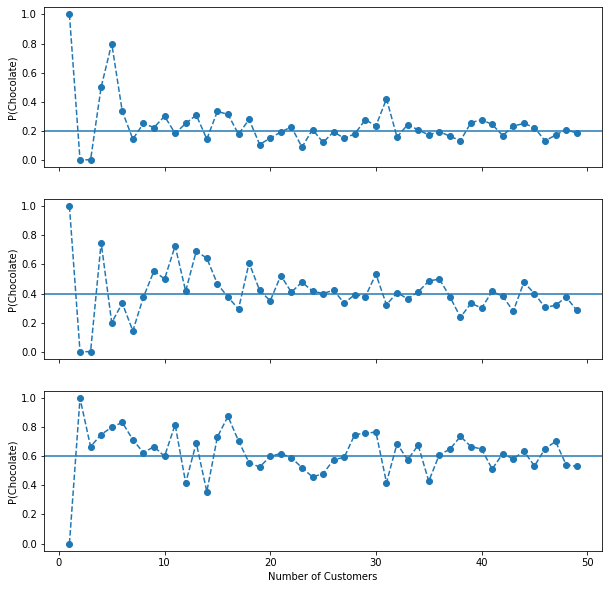

In [3]:
from scipy.stats import bernoulli
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(200)
pchoc = [.2, .4, .6]
sample_sizes = np.arange(1, 50)


fig, axes = plt.subplots(len(pchoc),1, figsize=(10,10), sharex=True, sharey=True)

for (i, p) in enumerate(pchoc):
    props = [np.mean(bernoulli.rvs(p, size=s)) for s in sample_sizes]
    axes[i].plot(sample_sizes, props, 'o--')
    axes[i].axhline(p)

axes[-1].set_xlabel('Number of Customers')
for ax in axes: ax.set_ylabel('P(Chocolate)')

plt.show()

## Sampling bias and the Central Limit Theorem

Notice two things in the above plots:

- At lower sample numbers the sample mean varies more widely. This is **sampling bias**. Any parameter you calculate from data will vary from sample to sample. The sample-to-sample variability of a parameter is its **sampling distribution**. 

- Even at larger samples the sample mean varies around the true probability (which is never known in practice).

As statisticians we know the nature of this variation. There is a rather remarkable statistical property of sampling called the **Central Limit Theorem**, which states when sample sizes are large enough the _sampling distribution of the mean_ will be normally distributed (a bell curve). Crucially this holds even if the data is not normally distributed (as in our case).

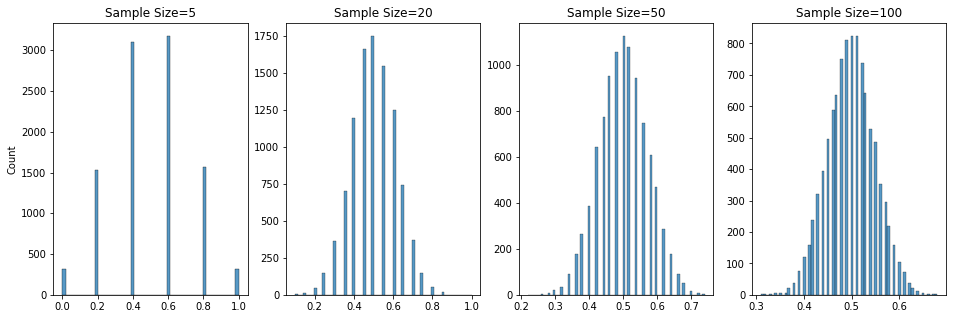

In [10]:
p=.5
sample_sizes = [5, 20, 50, 100]
n_samples = 10000


fig, axes = plt.subplots(1,len(sample_sizes), figsize=(16,5))

for (i,s) in enumerate(sample_sizes):
    sampling_dist = [np.mean(bernoulli.rvs(p, size=s)) for _ in range(n_samples)]
    sns.histplot(sampling_dist, ax=axes[i])
    axes[i].set_title(f'Sample Size={s}')
    if i > 0: axes[i].set_ylabel('')

plt.show()

The intuition behind the Central Limit Theorem is two fold:
- The more ways a thing can happen, the more likely it is to happen.
- There are more ways of making the average than any other number.

For example, take the leftmost plot. Here we have flipped a coin five times. There are 10 ways of getting 60% heads, and 10 ways of getting 40% heads, but only 1 way of getting all heads. 

The numbers of ways something can happen is mathematically captured in probability:


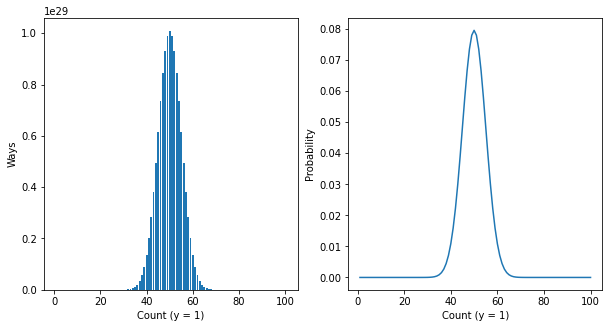

In [5]:

from scipy.special import binom as bcoeff
from scipy.stats import binom

p = .5
n = 100
fig, axes = plt.subplots(1,2, figsize=(10,5))
ways = [bcoeff(n,k) for k in np.arange(1,n+1)]
prob = [binom.pmf(k, n, p) for k in np.arange(1, n+1)]
noutcomes = [k for k in np.arange(1,n+1)]

axes[0].bar(noutcomes,ways)
axes[0].set_ylabel('Ways')
axes[0].set_xlabel('Count (y = 1)')
axes[1].plot(noutcomes,prob)
axes[1].set_ylabel('Probability')
axes[1].set_xlabel('Count (y = 1)')


plt.show()

## Statistical Learning

What we have been doing so far is generating data by sampling from a distribution with parameters. We have been using a **generative model**. 

```{admonition} Generative Models
A generative model describes how a dataset is generated, in terms of probability distributions. By sampling from this model, we are able to generate new data. Parameters are the control dials on a generative model. 
```

In most real situations, **neither the generative model nor the parameters are known**, and we will need to estimate them using the data we have collected. Statistical modeling works from the data upwards to figure out a model that might plausibly explain the data. 

Once we have learned a suitable model for our data, we can make inferences about the underlying phenomena using our knowledge of statistical sampling. We can also make predictions about new data.

Collecting new data will allow us to test our predictions and revise our model, and the scientific cycle continues.


In [25]:
g = graphviz.Digraph(format='svg')

g.attr(rankdir='LR')
g.graph_attr['size'] = '6,5'
g.node('Data', shape='star')
g.node('Generative Model', shape='oval')
g.node('Inference',shape='oval')
g.node('Prediction', shape='oval')



g.edge('Data','Generative Model')
g.edge('Generative Model','Inference')
g.edge('Generative Model','Prediction')

g.render('../../figures/4.1_2')

'../../figures/4.1_2.svg'

```{figure} ../../figures/4.1_2.svg
---
height: 150px
name: modelprocess
---

```   

In this section we have learned the theoretical building blocks of modelling. In the next section we will peek inside a model and learn how a model represents data.

### References and Further Reading

**Probability**
- [Basic probability visualisations](https://seeing-theory.brown.edu/basic-probability/index.html)
- [Conditional Probability animation](https://seeing-theory.brown.edu/basic-probability/index.html)
- [Confidence Intervals Animation](https://seeing-theory.brown.edu/basic-probability/index.html)
- [Poldrack Statistical Thinking Probability Chapter](https://web.stanford.edu/group/poldracklab/statsthinking21/probability.html#what-do-probabilities-mean)


**Modelling**:

- [Betancourt blog on Modelling and Inference](https://betanalpha.github.io/assets/case_studies/modeling_and_inference.html#11_the_observational_process)
- [Statistical Thinking Chapter 'What is a model'](https://web.stanford.edu/group/poldracklab/statsthinking21/fitting-models-to-data.html#what-is-a-model)
- [Modern Statistics for Modern Biology Chapter 1 - Generative Models for Discrete Data](https://web.stanford.edu/class/bios221/book/Chap-Generative.html)
- [McElreath Statistical Rethinking Chapters 1 & 2](https://xcelab.net/rmpubs/sr2/statisticalrethinking2_chapters1and2.pdf)

<!-- WHAT IS A MODEL

Here refer to the hackmd and point out that we have been referring to generative models (i.e. known parameters, can generate data).

But really the parameters are not known.

We want to learn them from data. 

Use the diagrams in the hackmd. 

Here point out that we have been working with Generative Models. I.e. known parameters, --> 